<a href="https://colab.research.google.com/github/EmmaJaneShaw/Favorita/blob/main/FavoritaModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install scipy
!pip install patsy
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import os #interact with operating system
from pandas import set_option #view more of the dataframe
import random
import sys

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Favorita/data_df_2017.csv',index_col=0)
train.head()

,store_nbr,item_nbr,unit_sales,onpromotion,month,week,day,cluster,dcoilwtico,class,...,x7_Cantonizacion de Guaranda,x7_Cantonizacion del Puyo,x7_Fundacion de Guayaquil,x7_Fundacion de Guayaquil-1,x7_Fundacion de Riobamba,x7_Fundacion de Santo Domingo,x7_Primer Grito de Independencia,x7_Traslado Batalla de Pichincha,x7_Traslado Primer Grito de Independencia,date
0,0.167717,-0.495590,-0.273354,-0.387515,-1.421905,-1.699662,1.140185,0.282467,0.01438,0.886950,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736461
1,0.167717,-0.488449,-0.082721,-0.387515,-1.421905,-1.699662,1.140185,0.282467,0.01438,-0.774469,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736461
2,0.167717,-0.486875,0.203228,-0.387515,-1.421905,-1.699662,1.140185,0.282467,0.01438,0.127636,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736461
3,0.167717,-0.480442,-0.321012,-0.387515,-1.421905,-1.699662,1.140185,0.282467,0.01438,-0.774469,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736461
4,0.167717,-0.476405,-0.178037,2.580545,-1.421905,-1.699662,1.140185,0.282467,0.01438,0.572809,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736461


In [4]:
# split it 
X = train.drop(['unit_sales'], axis=1)
Y = train[['unit_sales']]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,ElasticNet,Ridge
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [6]:
features = list(X.columns.values)
print(features)


['store_nbr', 'item_nbr', 'onpromotion', 'month', 'week', 'day', 'cluster', 'dcoilwtico', 'class', 'perishable', 'transactions', 'transferred', 'x0_Ecuador', 'x0_El Carmen', 'x0_Guaranda', 'x0_Guayaquil', 'x0_Puyo', 'x0_Riobamba', 'x0_Santo Domingo', 'x1_Ambato', 'x1_Babahoyo', 'x1_Cayambe', 'x1_Cuenca', 'x1_Daule', 'x1_El Carmen', 'x1_Esmeraldas', 'x1_Guaranda', 'x1_Guayaquil', 'x1_Ibarra', 'x1_Latacunga', 'x1_Libertad', 'x1_Loja', 'x1_Machala', 'x1_Manta', 'x1_Playas', 'x1_Puyo', 'x1_Quevedo', 'x1_Quito', 'x1_Riobamba', 'x1_Salinas', 'x1_Santo Domingo', 'x2_Additional', 'x2_Holiday', 'x2_Transfer', 'x3_Azuay', 'x3_Bolivar', 'x3_Chimborazo', 'x3_Cotopaxi', 'x3_El Oro', 'x3_Esmeraldas', 'x3_Guayas', 'x3_Imbabura', 'x3_Loja', 'x3_Los Rios', 'x3_Manabi', 'x3_Pastaza', 'x3_Pichincha', 'x3_Santa Elena', 'x3_Santo Domingo de los Tsachilas', 'x3_Tungurahua', 'x4_Local', 'x4_National', 'x5_AUTOMOTIVE', 'x5_BABY CARE', 'x5_BEAUTY', 'x5_BEVERAGES', 'x5_BOOKS', 'x5_BREAD/BAKERY', 'x5_CELEBRATION

In [7]:

def printvalues(model):
    model.fit(x_train.values, y_train.values)
    
    pred = model.predict(x_test.values)
    
    print(y_test.values)
    print(x_test.values)


In [8]:
def checkModelPerformance(model):
    model.fit(x_train.values, y_train.values)
    
    pred = model.predict(x_test.values)
    
    print("mean_squared_error: ",np.sqrt(mean_squared_error(y_test.values, pred))) 
    print("mean_absolute_error: ", np.sqrt(mean_absolute_error(y_test.values, pred)))
    print("root_mean_sqaured_error",np.sqrt(mean_absolute_error(y_test.values, pred)))


In [9]:
print("LinearRegression")
checkModelPerformance(LinearRegression())

LinearRegression
mean_squared_error:  0.9929066430388521
mean_absolute_error:  0.5624796533555697
root_mean_sqaured_error 0.5624796533555697


In [10]:
print("lasso regression ")
checkModelPerformance(linear_model.Lasso(alpha=0.1))

lasso regression 
mean_squared_error:  1.0127497834363366
mean_absolute_error:  0.5784830606130142
root_mean_sqaured_error 0.5784830606130142


In [11]:
print("Ridge regression ")
checkModelPerformance(Ridge(alpha=1.0))

Ridge regression 
mean_squared_error:  0.992907652257445
mean_absolute_error:  0.5624665335901096
root_mean_sqaured_error 0.5624665335901096


In [12]:
print("ElasticNet regression ")
checkModelPerformance(ElasticNet())

ElasticNet regression 
mean_squared_error:  1.0156900015149186
mean_absolute_error:  0.5824871267489674
root_mean_sqaured_error 0.5824871267489674


Fine-TuneModel
Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

KeyboardInterrupt: ignored

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [14]:
import xgboost as xgb
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [15]:
regressor.fit(x_train.values, y_train.values.ravel())

[06:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [16]:
boost_imp = pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=features)
print(boost_imp)

   store_nbr  item_nbr  onpromotion     month  week       day   cluster  \
0   0.014616  0.075533     0.068027  0.000363   0.0  0.011402  0.030847   

   dcoilwtico     class  perishable  ...  x7_Cantonizacion de Guaranda  \
0    0.002849  0.048619    0.009956  ...                           0.0   

   x7_Cantonizacion del Puyo  x7_Fundacion de Guayaquil  \
0                        0.0                        0.0   

   x7_Fundacion de Guayaquil-1  x7_Fundacion de Riobamba  \
0                          0.0                       0.0   

   x7_Fundacion de Santo Domingo  x7_Primer Grito de Independencia  \
0                            0.0                               0.0   

   x7_Traslado Batalla de Pichincha  \
0                          0.010188   

   x7_Traslado Primer Grito de Independencia  date  
0                                        0.0   0.0  

[1 rows x 112 columns]


[0.01461624 0.07553253 0.06802716 0.00036344 0.         0.01140227
 0.03084721 0.00284899 0.04861863 0.00995607 0.08307005 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00629918 0.         0.00859435 0.10684689 0.
 0.         0.00359415 0.         0.         0.         0.
 0.         0.0051353  0.06657418 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02184188 0.         0.         0.
 0.         0.         0.         0.         0.         0.08735852
 0.         0.         0.         0.00357797 0.01755325 0.0201905
 0.00351487 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0216893  0.00966644 0.         0.
 0.04306521 0.01303888 0.10295256 0.00383528 0.         0.08201315
 0.         0.         0.

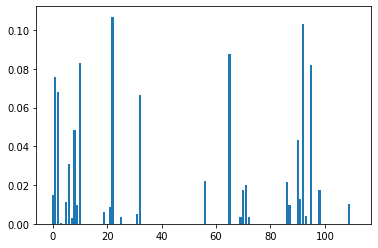

In [17]:
import matplotlib.pyplot as plt
print(regressor.feature_importances_)
# plot
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.show()

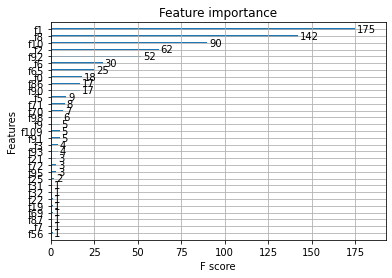

In [18]:
# plot feature importance
from xgboost import plot_importance
plot_importance(regressor)
plt.show()

In [ ]:
# Fit model using each importance as a threshold
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
# Fit model using each importance as a threshold

thresholds = sort(regressor.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(regressor, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(x_train.values, y_train.values.ravel())
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_x_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# select the features
selection = SelectFromModel(model, threshold=thresholds[2], prefit=True)

feature_idx = selection.get_support()
print(feature_idx)
# array([ True,  True,  True, False, False])

selected_dataset = selection.transform(X_test)
print(selected_dataset.shape)
# (200, 3)

In [ ]:
test =pd.read_csv('/content/drive/MyDrive/Favorita/test.csv',parse_dates=['date'])
test.head()

In [ ]:
test_2017 =pd.read_csv('/content/drive/MyDrive/Favorita/test_df_2017.csv',parse_dates=['date'],index_col=0)

In [ ]:
test_2017.head()